In [ ]:
# ../capstone/presentation/yay_gifs/aziz.gif
# ../capstone/presentation/yay_gifs/tina fey1.gif
# ../capstone/presentation/yay_gifs/tinafey2.gif

In [83]:
import music21 as m21

import pandas as pd
import numpy as np

import copy

In [2]:
bach_composer_search = m21.corpus.getComposer('bach')
list(bach_composer_search)

[u'//anaconda/envs/dsi/lib/python2.7/site-packages/music21/corpus/bach/bwv1.6.mxl',
 u'//anaconda/envs/dsi/lib/python2.7/site-packages/music21/corpus/bach/bwv10.7.mxl',
 u'//anaconda/envs/dsi/lib/python2.7/site-packages/music21/corpus/bach/bwv101.7.mxl',
 u'//anaconda/envs/dsi/lib/python2.7/site-packages/music21/corpus/bach/bwv102.7.mxl',
 u'//anaconda/envs/dsi/lib/python2.7/site-packages/music21/corpus/bach/bwv103.6.mxl',
 u'//anaconda/envs/dsi/lib/python2.7/site-packages/music21/corpus/bach/bwv104.6.mxl',
 u'//anaconda/envs/dsi/lib/python2.7/site-packages/music21/corpus/bach/bwv108.6.mxl',
 u'//anaconda/envs/dsi/lib/python2.7/site-packages/music21/corpus/bach/bwv11.6.mxl',
 u'//anaconda/envs/dsi/lib/python2.7/site-packages/music21/corpus/bach/bwv110.7.mxl',
 u'//anaconda/envs/dsi/lib/python2.7/site-packages/music21/corpus/bach/bwv111.6.mxl',
 u'//anaconda/envs/dsi/lib/python2.7/site-packages/music21/corpus/bach/bwv112.5-sc.mxl',
 u'//anaconda/envs/dsi/lib/python2.7/site-packages/musi

In [89]:
# create a dictionary of all of the bach chorales streams

# bach_dict = {
#     'bwv254' : {
#         'score': 'scoreobject',
#         'score_1' : 'scoreobject', # make all notes have same duration
#         'score_2' : 'scoreobject', # make score be in the same key
#         'orig_key': '',    
#       },
# }

def create_bach_dict():
    bach_dict = {}

    # make go from 251 to 438, the BWVs designated as chorales as per wikipedia research
    for bwv_no in range(253, 439): 

        # these the three scores that are not found in the corpus
        if bwv_no in [274, 275, 409]:
            pass
        else:
            try:
                score_key = 'bwv' + str(bwv_no)
                score_path = 'bach/' + score_key + '.mxl'

                # create an empty dictionary first with keys = the bwv name
                bach_dict[score_key] = {}
                bach_dict[score_key]['score'] = m21.corpus.parse(score_path)

            # print out exceptions so I can research them individually
            except:
                print "could not find this score: bwv" + str(bwv_no)

    return bach_dict

bach_dict = create_bach_dict()

could not find this score: bwv267
could not find this score: bwv388


In [90]:

# go through the exceptions

def add_addl_scores_to_dict(bwv_no_list):
    for bwv_no in bwv_no_list:
        bach_dict[bwv_no] = {}
        bach_dict[bwv_no]['score'] = m21.corpus.parse('bach/'+bwv_no+'.xml')

add_addl_scores_to_dict(['bwv267','bwv388'])

# could not find this score: bwv267
# added    
# could not find this score: bwv274
    # it is not in corpus
# could not find this score: bwv275
    # it is not in corpus
# could not find this score: bwv388
    # added
# could not find this score: bwv409
    # it is not in corpus

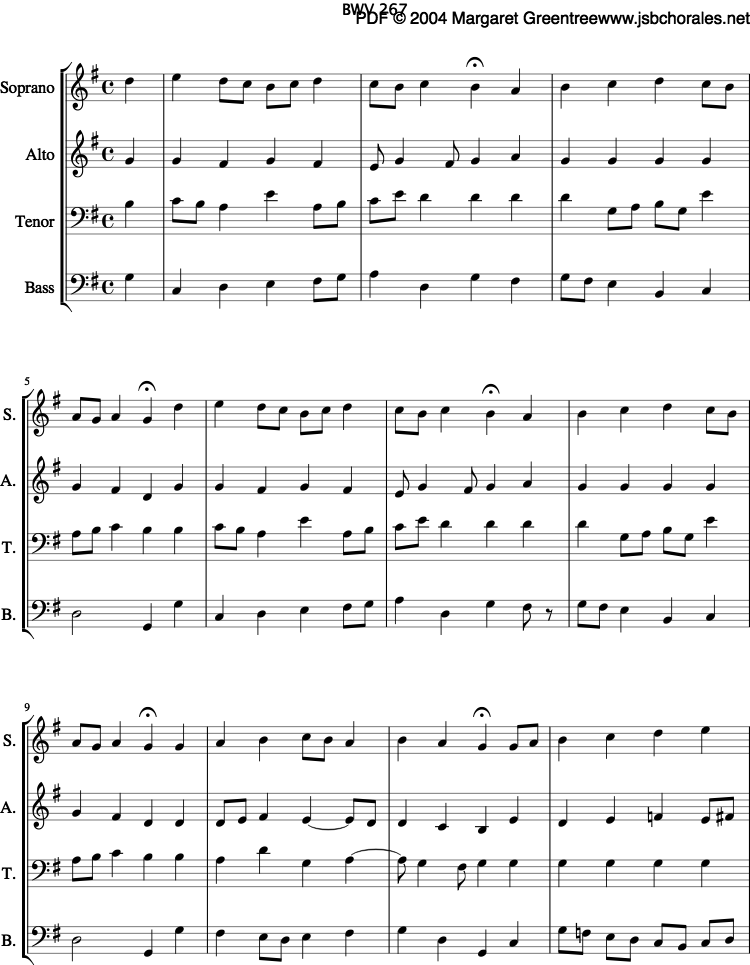

In [81]:
# check
bach_dict['bwv267']['score'].show()

![](../capstone/presentation/yay_gifs/tinafey1.gif)
### OK, I've got my beginning bach_dict!
### Conclusions:
- I need to go through and try to filter out to only keep ones with quarter note rhythms. Are there enough of these?
- Let's do that by looking at ones with four parts first, then increase complexity by adding on the other ones later

- I need to go through and remove the non-SATB parts

In [73]:
# create test bach dict that is smaller for TESTING
test_bach_dict = {}

# for i, key in enumerate(bach_dict):
random_five = np.random.choice(bach_dict.keys(), size=5)
print random_five
#     for key in random_five:
for key in random_five:
    test_bach_dict[key] = bach_dict[key]

test_bach_dict


['bwv285' 'bwv367' 'bwv286' 'bwv285' 'bwv253']


{'bwv253': <music21.stream.Score 0x110e4e290>,
 'bwv285': <music21.stream.Score 0x113d76850>,
 'bwv286': <music21.stream.Score 0x1145cb5d0>,
 'bwv367': <music21.stream.Score 0x12727d710>}

### this is what the scores look like

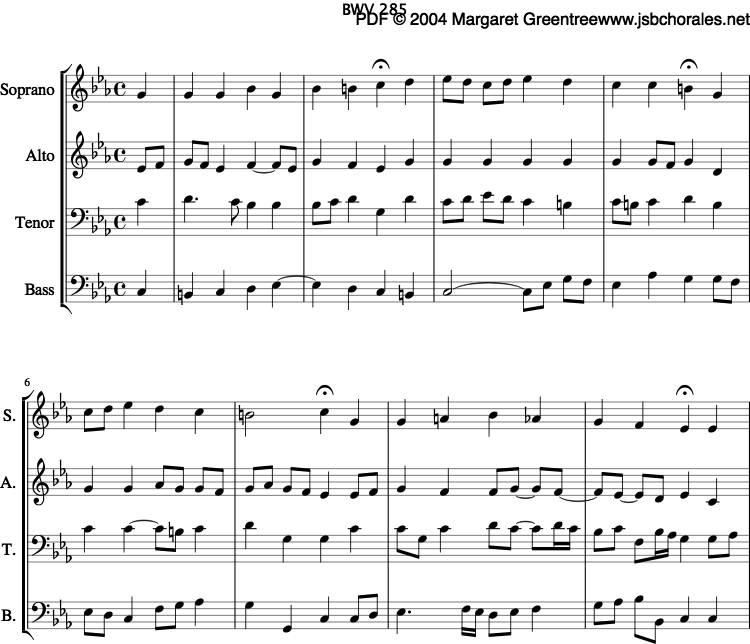

In [75]:
test_bach_dict['bwv285'].show()


## ignore this

OK, so I have 185 of these.
- let me just look at a SUBSET of chorales with four parts only
- then of those, see whether the rhythms are the same


In [35]:
# cycle through each score in bach_dict, determine whether it has four parts or more 

four_part_bach_dict = {}
more_than_four_part_bach_dict = {}

for key, score in bach_dict.items():
    if len(score.getElementsByClass('Part')) == 4:
        four_part_bach_dict[key] = score
    else:
        more_than_four_part_bach_dict[key] = score
        
print len(four_part_bach_dict)
print len(more_than_four_part_bach_dict)

183
2


OK, I just have two with more than four parts.

In [36]:
more_than_four_part_bach_dict

{'bwv251': <music21.stream.Score 0x10d900690>,
 'bwv252': <music21.stream.Score 0x110e4e310>}

In [ ]:
# # for each score in four_part_bach_dict
# # can we return the total number of notes?
#     # for each part
#         # return all notes
#         # count the number of notes
#         # split up the notes by duration - 16th, 8th, quarter, half
#         # count each type
#     # sum up all counts for each part

# for key, score in test_bach_dict:
    
#     for part in score.GetElementsByClass('Part'):
        
        


# for element in list(bwv279.parts)[0].recurse().notes:
#     print element, element.duration

# them of the ones that are NOT four parts only:
# try to remove parts that are NOT SATB
# then 

### ok never mind, not going to filter out only quarter notes. instead i'm going to take the notes that are different durations and make them all the same

In [65]:
bach_dict = four_part_bach_dict

## OK pick up again

In [ ]:
# schema_bach_info_dict = {
#     'bwv254' : {
#         'score': 'scoreobject',
#         'score_1' : 'scoreobject', # make all notes have same duration
#         'score_2' : 'scoreobject', # make score be in the same key
#         'orig_key': '',    
#     },
# }




## turn a score into one where all notes have the same duration.

In [335]:
# use deepcopy to create a copy of the score. we will turn this into a score where
# all the notes have the same duration.

def make_score_copy():
    
    for key in bach_dict.keys():
        bach_dict[key]['score1'] = copy.deepcopy(bach_dict[key]['score'])
        
make_score_copy()


figure out what the minimum duration is for all notes
most likely 16th notes. hopefuly nothing else smaller

In [105]:

def find_smallest_duration_of_score(key):    
    # set a smallest duration - we know there are quarter notes in all bach chorales
    smallest_duration = 1.0
    
    # find the score for this bwv key
    score = bach_dict[key]['score1']

    for note in score.recurse().notes:
        # iteratively go through and determine smallest duration by checking each note
        if note.quarterLength < smallest_duration:
            smallest_duration = note.quarterLength

    return smallest_duration

find_smallest_duration_of_score('bwv267')

0.25

In [110]:
def determine_smallest_duration_all_scores():
    smallest_duration = 1.0
    
    for key in bach_dict.keys():
        each_smallest_duration = find_smallest_duration_of_score(key)
        if each_smallest_duration == 0.125:
            print "This score has 32nd notes:", key
        
        if each_smallest_duration < smallest_duration:
            smallest_duration = each_smallest_duration
            
    return smallest_duration

determine_smallest_duration_all_scores()

This score has 32nd notes: bwv432


0.125

In [112]:
# shit. some of them have 32nd notes.
bach_dict['bwv432']['score1'].show('MusicXML')

# OK - this score has 2 instances of 2 32nd notes that I can turn into 16th notes. 
# it is dotted eighth plus 2 32nd. i will make it 1 eighth + 2 16ths.

once i have the minimum duration, take each note that isn't a 16th note and turn it into 16th notes

In [153]:
# play around - how to access and change notes in a stream
test = copy.deepcopy(bach_dict['bwv267']['score1'])

In [154]:
test.show('text')

{0.0} <music21.text.TextBox "BWV 267">
{0.0} <music21.text.TextBox "PDF © 2004...">
{0.0} <music21.metadata.Metadata object at 0x20869dbd0>
{0.0} <music21.stream.Part Soprano>
    {0.0} <music21.instrument.Instrument P1: Soprano: Instrument 1>
    {0.0} <music21.stream.Measure 0 offset=0.0>
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of G major>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.note.Note D>
    {1.0} <music21.stream.Measure 1 offset=1.0>
        {0.0} <music21.note.Note E>
        {1.0} <music21.note.Note D>
        {1.5} <music21.note.Note C>
        {2.0} <music21.note.Note B>
        {2.5} <music21.note.Note C>
        {3.0} <music21.note.Note D>
    {5.0} <music21.stream.Measure 2 offset=5.0>
        {0.0} <music21.note.Note C>
        {0.5} <music21.note.Note B>
        {1.0} <music21.note.Note C>
        {2.0} <music21.note.Note B>
        {3.0} <music21.note.Note A>
    {

In [289]:
test.remove(test[1])
test

<music21.stream.Score 0x20879cc10>

In [131]:
for note in test.recurse().notes:
    print note.measureNumber, note.offset, note, note.quarterLength

0 0.0 <music21.note.Note D> 1.0
1 0.0 <music21.note.Note E> 1.0
1 0.0 <music21.note.Note C> 1.0
1 0.0 <music21.note.Note C> 1.0
1 1.0 <music21.note.Note D> 0.5
1 1.5 <music21.note.Note C> 0.5
1 2.0 <music21.note.Note B> 0.5
1 2.5 <music21.note.Note C> 0.5
1 3.0 <music21.note.Note D> 1.0
2 0.0 <music21.note.Note C> 0.5
2 0.5 <music21.note.Note B> 0.5
2 1.0 <music21.note.Note C> 1.0
2 2.0 <music21.note.Note B> 1.0
2 3.0 <music21.note.Note A> 1.0
3 0.0 <music21.note.Note B> 1.0
3 1.0 <music21.note.Note C> 1.0
3 2.0 <music21.note.Note D> 1.0
3 3.0 <music21.note.Note C> 0.5
3 3.5 <music21.note.Note B> 0.5
4 0.0 <music21.note.Note A> 0.5
4 0.5 <music21.note.Note G> 0.5
4 1.0 <music21.note.Note A> 1.0
4 2.0 <music21.note.Note G> 1.0
4 3.0 <music21.note.Note D> 1.0
5 0.0 <music21.note.Note E> 1.0
5 1.0 <music21.note.Note D> 0.5
5 1.5 <music21.note.Note C> 0.5
5 2.0 <music21.note.Note B> 0.5
5 2.5 <music21.note.Note C> 0.5
5 3.0 <music21.note.Note D> 1.0
6 0.0 <music21.note.Note C> 0.5
6 0.5 <m

In [206]:
# test measure 
tm = copy.deepcopy(test.parts[0].getElementsByClass('Measure')[1])

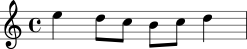

In [194]:
tm.show()

In [207]:
tm.show('text')

{0.0} <music21.note.Note E>
{1.0} <music21.note.Note D>
{1.5} <music21.note.Note C>
{2.0} <music21.note.Note B>
{2.5} <music21.note.Note C>
{3.0} <music21.note.Note D>


In [310]:
for item in tm.sites.Sites:
    
    print item, item.fullName

AttributeError: 'Sites' object has no attribute 'Sites'

In [135]:
for note in tm.notes:
    print note.offset, note.fullName, note.name, note.octave, note.quarterLength

 0.0 E in octave 5 Quarter Note E 5 1.0
0.0 C in octave 4 Quarter Note C 4 1.0
0.0 C in octave 4 Quarter Note C 4 1.0
1.0 D in octave 5 Eighth Note D 5 0.5
1.5 C in octave 5 Eighth Note C 5 0.5
2.0 B in octave 4 Eighth Note B 4 0.5
2.5 C in octave 5 Eighth Note C 5 0.5
3.0 D in octave 5 Quarter Note D 5 1.0


In [316]:
# function to replace notes with 16th notes FOR A SINGLE MEASURE

def sub_16th_notes_in_single_measure(measure_var):
    for orig_note in measure_var.notes:
#         print orig_note.offset, orig_note, orig_note.quarterLength

        # determine how many 16th notes i have to make to replace the note
        if orig_note.quarterLength > 0.25:
            n_sixteenths = orig_note.quarterLength / 0.25

            # each 16th note is going to look like this:
            replacement_note = m21.note.Note(orig_note.name + str(orig_note.octave))
            replacement_note.quarterLength = 0.25

            # set each 16th note! do it as many times as required (denoted by n_sixteenths)
            for nth_16th_note_increment in range(int(n_sixteenths)):
                # the first 16th note will be placed exactly at the orig_note's offset
                # the next ones will be offset by 16th note increments
                location = orig_note.offset + nth_16th_note_increment * 0.25

                # insert a COPY of the replacement note at the location
                measure_var.insert(location, copy.deepcopy(replacement_note))

            # remove the original note
            measure_var.remove(orig_note)

        if orig_note.quarterLength == 0.125:
            print "You need to look at this score and remove the 32nd notes."
            print "The score is: ACCKKKK" 
    return measure_var
# # tm.show('text')



In [313]:
tm = sub_16th_notes_in_single_measure(tm)
tm.show('text')

0.0 <music21.note.Note E> 0.25
0.25 <music21.note.Note E> 0.25
0.5 <music21.note.Note E> 0.25
0.75 <music21.note.Note E> 0.25
1.0 <music21.note.Note D> 0.25
1.25 <music21.note.Note D> 0.25
1.5 <music21.note.Note C> 0.25
1.75 <music21.note.Note C> 0.25
2.0 <music21.note.Note B> 0.25
2.25 <music21.note.Note B> 0.25
2.5 <music21.note.Note C> 0.25
2.75 <music21.note.Note C> 0.25
3.0 <music21.note.Note D> 0.25
3.25 <music21.note.Note D> 0.25
3.5 <music21.note.Note D> 0.25
3.75 <music21.note.Note D> 0.25
{0.0} <music21.note.Note E>
{0.25} <music21.note.Note E>
{0.5} <music21.note.Note E>
{0.75} <music21.note.Note E>
{1.0} <music21.note.Note D>
{1.25} <music21.note.Note D>
{1.5} <music21.note.Note C>
{1.75} <music21.note.Note C>
{2.0} <music21.note.Note B>
{2.25} <music21.note.Note B>
{2.5} <music21.note.Note C>
{2.75} <music21.note.Note C>
{3.0} <music21.note.Note D>
{3.25} <music21.note.Note D>
{3.5} <music21.note.Note D>
{3.75} <music21.note.Note D>


In [274]:
# write a function to get a measure-level function to be executed over a stream
# does NOT return anything, instead basically is "in place"
def recurse_measure_level_function_on_part(part_name, function):
    """ __doc__ = this is the doc"""
    for x in part_name.elements:
        if type(x) == m21.stream.Measure:
            print 'yup this is measure', x.measureNumber
            function(x)

In [236]:
recurse_measure_level_function_on_part(tms, sub_16th_notes_in_single_measure)

0.0 <music21.note.Note E> 1.0
1.0 <music21.note.Note D> 0.5
1.5 <music21.note.Note C> 0.5
2.0 <music21.note.Note B> 0.5
2.5 <music21.note.Note C> 0.5
3.0 <music21.note.Note D> 1.0
0.0 <music21.note.Note C> 0.5
0.5 <music21.note.Note B> 0.5
1.0 <music21.note.Note C> 1.0
2.0 <music21.note.Note B> 1.0
3.0 <music21.note.Note A> 1.0


In [237]:
tms.show('text')

{1.0} <music21.stream.Measure 1 offset=1.0>
    {0.0} <music21.note.Note E>
    {0.25} <music21.note.Note E>
    {0.5} <music21.note.Note E>
    {0.75} <music21.note.Note E>
    {1.0} <music21.note.Note D>
    {1.25} <music21.note.Note D>
    {1.5} <music21.note.Note C>
    {1.75} <music21.note.Note C>
    {2.0} <music21.note.Note B>
    {2.25} <music21.note.Note B>
    {2.5} <music21.note.Note C>
    {2.75} <music21.note.Note C>
    {3.0} <music21.note.Note D>
    {3.25} <music21.note.Note D>
    {3.5} <music21.note.Note D>
    {3.75} <music21.note.Note D>
{5.0} <music21.stream.Measure 2 offset=5.0>
    {0.0} <music21.note.Note C>
    {0.25} <music21.note.Note C>
    {0.5} <music21.note.Note B>
    {0.75} <music21.note.Note B>
    {1.0} <music21.note.Note C>
    {1.25} <music21.note.Note C>
    {1.5} <music21.note.Note C>
    {1.75} <music21.note.Note C>
    {2.0} <music21.note.Note B>
    {2.25} <music21.note.Note B>
    {2.5} <music21.note.Note B>
    {2.75} <music21.note.Note B>
  

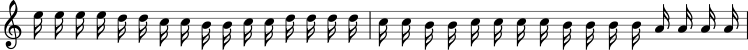

In [232]:
tms.show()

In [233]:
tms = copy.deepcopy(test[3][2:4])

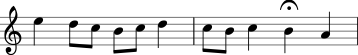

In [179]:
tms.show()

In [256]:
tms.show('text')

{1.0} <music21.stream.Measure 1 offset=1.0>
    {0.0} <music21.note.Note E>
    {0.25} <music21.note.Note E>
    {0.5} <music21.note.Note E>
    {0.75} <music21.note.Note E>
    {1.0} <music21.note.Note D>
    {1.25} <music21.note.Note D>
    {1.5} <music21.note.Note C>
    {1.75} <music21.note.Note C>
    {2.0} <music21.note.Note B>
    {2.25} <music21.note.Note B>
    {2.5} <music21.note.Note C>
    {2.75} <music21.note.Note C>
    {3.0} <music21.note.Note D>
    {3.25} <music21.note.Note D>
    {3.5} <music21.note.Note D>
    {3.75} <music21.note.Note D>
{5.0} <music21.stream.Measure 2 offset=5.0>
    {0.0} <music21.note.Note C>
    {0.25} <music21.note.Note C>
    {0.5} <music21.note.Note B>
    {0.75} <music21.note.Note B>
    {1.0} <music21.note.Note C>
    {1.25} <music21.note.Note C>
    {1.5} <music21.note.Note C>
    {1.75} <music21.note.Note C>
    {2.0} <music21.note.Note B>
    {2.25} <music21.note.Note B>
    {2.5} <music21.note.Note B>
    {2.75} <music21.note.Note B>
  

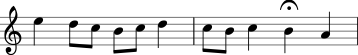

In [177]:
tms.show()

In [259]:
len(tms)

2

In [261]:
soprano.elements

(<music21.instrument.Instrument P1: Soprano: Instrument 1>,
 <music21.stream.Measure 0 offset=0.0>,
 <music21.stream.Measure 1 offset=1.0>,
 <music21.stream.Measure 2 offset=5.0>,
 <music21.stream.Measure 3 offset=9.0>,
 <music21.stream.Measure 4 offset=13.0>,
 <music21.stream.Measure 5 offset=17.0>,
 <music21.stream.Measure 6 offset=21.0>,
 <music21.stream.Measure 7 offset=25.0>,
 <music21.stream.Measure 8 offset=29.0>,
 <music21.stream.Measure 9 offset=33.0>,
 <music21.stream.Measure 10 offset=37.0>,
 <music21.stream.Measure 11 offset=41.0>,
 <music21.stream.Measure 12 offset=45.0>,
 <music21.stream.Measure 13 offset=49.0>,
 <music21.stream.Measure 14 offset=53.0>,
 <music21.stream.Measure 15 offset=57.0>,
 <music21.stream.Measure 16 offset=61.0>,
 <music21.stream.Measure 17 offset=65.0>,
 <music21.stream.Measure 18 offset=69.0>,
 <music21.stream.Measure 19 offset=73.0>,
 <music21.stream.Measure 20 offset=77.0>,
 <music21.stream.Measure 21 offset=81.0>)

In [275]:
soprano = copy.deepcopy(test[3])

In [276]:
recurse_measure_level_function_on_part(soprano, sub_16th_notes_in_single_measure)

yup this is measure 0
0.0 <music21.note.Note D> 1.0
yup this is measure 1
0.0 <music21.note.Note E> 1.0
1.0 <music21.note.Note D> 0.5
1.5 <music21.note.Note C> 0.5
2.0 <music21.note.Note B> 0.5
2.5 <music21.note.Note C> 0.5
3.0 <music21.note.Note D> 1.0
yup this is measure 2
0.0 <music21.note.Note C> 0.5
0.5 <music21.note.Note B> 0.5
1.0 <music21.note.Note C> 1.0
2.0 <music21.note.Note B> 1.0
3.0 <music21.note.Note A> 1.0
yup this is measure 3
0.0 <music21.note.Note B> 1.0
1.0 <music21.note.Note C> 1.0
2.0 <music21.note.Note D> 1.0
3.0 <music21.note.Note C> 0.5
3.5 <music21.note.Note B> 0.5
yup this is measure 4
0.0 <music21.note.Note A> 0.5
0.5 <music21.note.Note G> 0.5
1.0 <music21.note.Note A> 1.0
2.0 <music21.note.Note G> 1.0
3.0 <music21.note.Note D> 1.0
yup this is measure 5
0.0 <music21.note.Note E> 1.0
1.0 <music21.note.Note D> 0.5
1.5 <music21.note.Note C> 0.5
2.0 <music21.note.Note B> 0.5
2.5 <music21.note.Note C> 0.5
3.0 <music21.note.Note D> 1.0
yup this is measure 6
0.0 <m

In [277]:
soprano.show('text') #"""WORKED!!!!"""

{0.0} <music21.instrument.Instrument P1: Soprano: Instrument 1>
{0.0} <music21.stream.Measure 0 offset=0.0>
    {0.0} <music21.layout.SystemLayout>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.key.Key of G major>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.note.Note D>
    {0.25} <music21.note.Note D>
    {0.5} <music21.note.Note D>
    {0.75} <music21.note.Note D>
{1.0} <music21.stream.Measure 1 offset=1.0>
    {0.0} <music21.note.Note E>
    {0.25} <music21.note.Note E>
    {0.5} <music21.note.Note E>
    {0.75} <music21.note.Note E>
    {1.0} <music21.note.Note D>
    {1.25} <music21.note.Note D>
    {1.5} <music21.note.Note C>
    {1.75} <music21.note.Note C>
    {2.0} <music21.note.Note B>
    {2.25} <music21.note.Note B>
    {2.5} <music21.note.Note C>
    {2.75} <music21.note.Note C>
    {3.0} <music21.note.Note D>
    {3.25} <music21.note.Note D>
    {3.5} <music21.note.Note D>
    {3.75} <music21.note.Note D>
{5.0} <music21.stream.Measure 2 offset=

In [325]:
# make a function to go through a score, identify the parts,
# and recurse a function on the measures of each part

def recurse_measure_level_function_on_score(score, function):
    """takes a function taht works on a MEASURE and makes it work on
    an overall stream/SCORE"""
    for score_element in score.elements:
        # do this on score elements that are PARTS
        if type(score_element) == m21.stream.Part:
            print 'yup this is part', score_element.partName

            # within a part, do this on part elements that are MEASURES
            for part_element in score_element.elements:
                if type(part_element) == m21.stream.Measure:
#                     print 'yup this is measure', part_element.measureNumber
                    function(part_element)


In [319]:
recurse_measure_level_function_on_score(test, 
                                        sub_16th_notes_in_single_measure)

yup this is part Soprano
yup this is measure 0
yup this is measure 1
yup this is measure 2
yup this is measure 3
yup this is measure 4
yup this is measure 5
yup this is measure 6
yup this is measure 7
yup this is measure 8
yup this is measure 9
yup this is measure 10
yup this is measure 11
yup this is measure 12
yup this is measure 13
yup this is measure 14
yup this is measure 15
yup this is measure 16
yup this is measure 17
yup this is measure 18
yup this is measure 19
yup this is measure 20
yup this is measure 21
yup this is part Alto
yup this is measure 0
yup this is measure 1
yup this is measure 2
yup this is measure 3
yup this is measure 4
yup this is measure 5
yup this is measure 6
yup this is measure 7
yup this is measure 8
yup this is measure 9
yup this is measure 10
yup this is measure 11
yup this is measure 12
yup this is measure 13
yup this is measure 14
yup this is measure 15
yup this is measure 16
yup this is measure 17
yup this is measure 18
yup this is measure 19
yup thi

In [322]:
test.show('MusicXML')
# OK it seems like this works

In [336]:
# turn EVERy score1 into a score that is comprised completely of 
# 16th notes

def create_score1_bach_dict():
    # for every bach chorale in the keys
    for i, bach_key in enumerate(bach_dict.keys()):
        score = bach_dict[bach_key]['score1']
        score.id = bach_key
        print i, score.id
        
        recurse_measure_level_function_on_score(score,
                                               sub_16th_notes_in_single_measure)
    

In [337]:
create_score1_bach_dict()

0 bwv421
yup this is part Soprano
yup this is part Alto
yup this is part Tenor
yup this is part Bass
1 bwv346
yup this is part Soprano
yup this is part Alto
yup this is part Tenor
yup this is part Bass
2 bwv347
yup this is part Soprano
yup this is part Alto
yup this is part Tenor
yup this is part Bass
3 bwv344
yup this is part Soprano
yup this is part Alto
yup this is part Tenor
yup this is part Bass
4 bwv345
yup this is part Soprano
yup this is part Alto
yup this is part Tenor
yup this is part Bass
5 bwv342
yup this is part Soprano
yup this is part Alto
yup this is part Tenor
yup this is part Bass
6 bwv343
yup this is part Soprano
yup this is part Alto
yup this is part Tenor
yup this is part Bass
7 bwv340
yup this is part Soprano
yup this is part Alto
yup this is part Tenor
yup this is part Bass
8 bwv341
yup this is part Soprano
yup this is part Alto
yup this is part Tenor
yup this is part Bass
9 bwv427
yup this is part Soprano
yup this is part Alto
yup this is part Tenor
yup this is 

AttributeError: 'Chord' object has no attribute 'name'

### Now that we have score1, we need score2, 

transpose all to the same key


check time signature for all of these.  some in 3/4 and some in 4/4?